<a href="https://colab.research.google.com/github/e-pyrom/DS-Unit-1-Sprint-2-Statistics/blob/master/PE%3A%20Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
##1. Write a function

def prob_drug_use(prob_drug_prior, false_positive_rate, true_positive_rate, number_of_tests):
    posterior_probability=prob_drug_prior
    for test in range(0, number_of_tests):
        P_user = posterior_probability # prior belief
        P_non_user = 1 - P_user #complement of the prior belief
        P_pos_given_user = false_positive_rate #this is the true positive rate
        P_pos_given_non_user = true_positive_rate #this is the false positive rate
        posterior_probability = (P_pos_given_user*P_user)/((P_pos_given_user*P_user) + (P_pos_given_non_user*P_non_user))
    return posterior_probability

In [2]:
#Probability that person is drunk after 1 positive breathalyzer:
prob_drug_use(1/1000, 1, .08, 1)

0.012357884330202669

In [0]:
post_prob_1pos = prob_drug_use(1/1000, 1, .08, 1)

In [10]:
# ...after 2 positive breathalyzers:
prob_drug_use(post_prob_1pos, 1, .08, 1)

0.13525210993291495

In [0]:
post_prob_2pos=prob_drug_use(post_prob_1pos, 1, .08, 1)

In [12]:
# ...after 3 positive breathalyzers:
prob_drug_use(post_prob_2pos, 1, .08, 1)

0.6615996951348605

In [0]:
post_prob_3pos=prob_drug_use(post_prob_2pos, 1, .08, 1)

In [14]:
# 4 positive breathalyzers gives over a 95% probability of being drunk.
# Probability that person is drunk after 4 breathalyzers:
prob_drug_use(post_prob_3pos, 1, .08, 1)

0.9606895076105054

In [0]:
#2. Explore scipy.stats.bayes_mvs

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [33]:
df['age'].mean()

38.58164675532078

In [34]:
# Frequentist Approach
# 95% confidence interval on either side

conf_freq=stats.t.interval(0.95,
                 df.shape[0],
                 loc = df['age'].mean(),
                 scale = stats.sem(df['age'])
                 )

conf_freq

(38.433482476875845, 38.72981103376572)

In [35]:
#Bayesian Approach
conf_bayes=stats.bayes_mvs(df['age'], alpha=.95)[0][1]
conf_bayes

(38.433490259580736, 38.72980325106083)

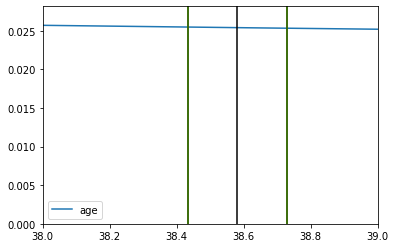

In [36]:
#kernel density estimate
sns.kdeplot(df['age'])
plt.xlim(38,39)
plt.axvline(x=conf_freq[0], color='red')
plt.axvline(x=conf_freq[1], color='red')
plt.axvline(x=conf_bayes[0], color='green')
plt.axvline(x=conf_bayes[1], color='green')
plt.axvline(x=df['age'].mean(), color='k');

I understand Bayesian statistics as a method to determine a probability of an event, that factors in prior knowledge/probability of the event.
Frequentist statistics does not factor in prior probability and calculates by repreated trials, and relative frequency of outcomes.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!